# Importing Libraries and dataset

In [1]:
import pickle  #to unpickle data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

sns.set(style='white', context='notebook', palette='deep')

Using TensorFlow backend.


In [2]:
train = open('train_image.pkl','rb')
train_data = pickle.load(train)
train.close()
test = open('test_image.pkl','rb')
test_data = pickle.load(test)
test.close()



In [3]:
temp = open('train_label.pkl','rb')
label = pickle.load(temp)

In [4]:
label[1]

0

3    2000
2    2000
1    2000
0    2000
dtype: int64

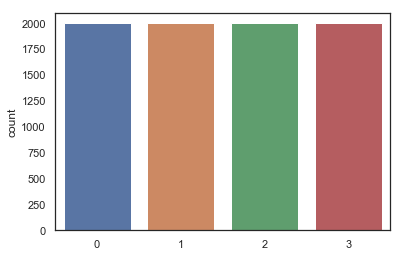

In [5]:
# creating alias for label as --> 2->1, 3->2, 6->3 to simplify the process of categorical conversion of labels
label = pd.Series(label)

for i in range(len(label)):
    if label[i]==2:
        label[i] = 1
    
    elif label[i]==3:
        label[i] = 2
        
    elif label[i]==6:
        label[i] = 3

                                   
g = sns.countplot(label)
label = pd.Series(label)
label.value_counts()

In [6]:
type(label)

pandas.core.series.Series

In [7]:
len(train_data[1])


784

## Creating dataset

In [8]:
X_train = pd.DataFrame(train_data) # converting the list to pandas dataframe

In [9]:
type(X_train)

pandas.core.frame.DataFrame

In [10]:
X_train.shape

(8000, 784)

In [11]:
test = pd.DataFrame(test_data)   # converting the list to pandas dataframe

In [12]:
test.shape

(2000, 784)

In [13]:
# Normalising the data to reduce variance
X_train = X_train / 255.0
test = test / 255.0

In [14]:
# Reshape image in 3 dimensions (height = 28px, width = 28px , canal = 1) as it will be the input to the CNN
X_train = X_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)

In [15]:
type(X_train)


numpy.ndarray

In [16]:
X_train.shape

(8000, 28, 28, 1)

 ## Label encoding

In [17]:
type(label)

pandas.core.series.Series

In [18]:
label = to_categorical(label, num_classes = 4)

## Split training and valdiation set

In [19]:
# Set the random seed
random_seed = 2

In [20]:
X_train, X_val, Y_train, Y_val = train_test_split(X_train, label, test_size = 0.1, random_state=random_seed)

In [21]:
type(X_train[0])

numpy.ndarray

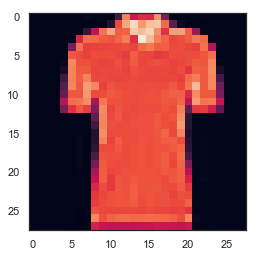

In [22]:
g = plt.imshow(X_train[458][:,:,0])

In [23]:
Y_train

array([[ 1.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  1.],
       ..., 
       [ 0.,  0.,  0.,  1.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  1.]], dtype=float32)

In [24]:
Y_train.shape

(7200, 4)

In [25]:
#Creating a CNN using keras Sequential library which caontain 2 convolutional layers and 2 fully connected layers with maxpooling ans 2 droput layesrs

model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5),activation='relu',input_shape=(28,28,1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))  
    


In [26]:
# Compiling the model and fitting the model on the dataset
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

history = model.fit(X_train,Y_train, epochs=10, validation_data=(X_val, Y_val))


Train on 7200 samples, validate on 800 samples
Epoch 1/10
7200/7200 [==============================] - 153s 21ms/step - loss: 0.6768 - acc: 0.7217 - val_loss: 0.5049 - val_acc: 0.7900
Epoch 2/10
7200/7200 [==============================] - 165s 23ms/step - loss: 0.4959 - acc: 0.8060 - val_loss: 0.4371 - val_acc: 0.8300
Epoch 3/10
7200/7200 [==============================] - 145s 20ms/step - loss: 0.4305 - acc: 0.8317 - val_loss: 0.4235 - val_acc: 0.8363
Epoch 4/10
7200/7200 [==============================] - 163s 23ms/step - loss: 0.3861 - acc: 0.8468 - val_loss: 0.3750 - val_acc: 0.8400
Epoch 5/10
7200/7200 [==============================] - 139s 19ms/step - loss: 0.3574 - acc: 0.8587 - val_loss: 0.3857 - val_acc: 0.8500
Epoch 6/10
7200/7200 [==============================] - 157s 22ms/step - loss: 0.3335 - acc: 0.8671 - val_loss: 0.3709 - val_acc: 0.8512
Epoch 7/10
7200/7200 [==============================] - 139s 19ms/step - loss: 0.3079 - acc: 0.8715 - val_loss: 0.3614 - val_acc: 0

In [27]:
#This helps us to check the accuracy and the loss of the model 
(eval_loss, eval_accuracy) = model.evaluate(X_val, Y_val)

print("[INFO] accuracy: {:.2f}%".format(eval_accuracy * 100))
print("[INFO] Loss: {}".format(eval_loss))
plt.figure(1)

800/800 [==============================] - 2s 2ms/step
[INFO] accuracy: 86.38%
[INFO] Loss: 0.3677463835477829


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

## Plotting and analysis

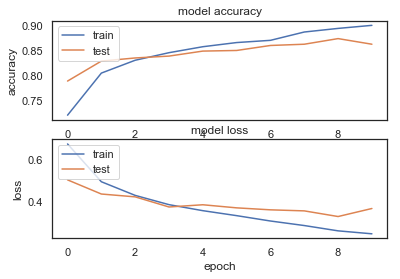

In [28]:
plt.subplot(211)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

plt.subplot(212)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

 

In [38]:
Y_pred = model.predict(X_val)
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
Y_true = np.argmax(Y_val,axis = 1) 
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
confusion_mtx

array([[178,   7,   4,  15],
       [  2, 171,   2,  10],
       [  6,   2, 196,   8],
       [ 22,  22,   9, 146]], dtype=int64)

## Predictions and Saving results

In [35]:
# predict results
results = model.predict(test)

# select the indix with the maximum probability
results = np.argmax(results,axis = 1)

results = pd.Series(results,name="Label")

In [36]:
results.value_counts(dropna=False)


1    532
0    529
2    482
3    457
Name: Label, dtype: int64

In [39]:
type(results)

pandas.core.series.Series

2    532
0    529
3    482
6    457
Name: Label, dtype: int64

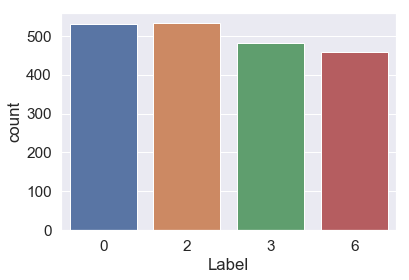

In [40]:
results = pd.Series(results)

for i in range(len(results)):
    if results[i]==1:
        results[i] = 2
    
    elif results[i]==2:
        results[i] = 3
        
    elif results[i]==3:
        results[i] = 6

                                   
g = sns.countplot(results)
results = pd.Series(results)
results.value_counts()

In [41]:
results.to_csv('Rahul_Kanojia.csv')

C:\Users\Rahul\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.
